In [1]:
%%html
<style>
td.left {
    text-align:left
}
th.left {
    text-align:left
}

.quote {
    font-size: 1.8em;
    text-align: left;
    font-weight: bold;
    padding: 20px;
     line-height: 1.2;
}

.sign {
    font-size:1em;
    text-align: right;
    line-height: 1.2;
}


</style>

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import pandas as pd

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,9]

dc='#1f77b4' #default color

# Statistical Inference

Statistical inference is the process of deducing properties of an underlying probability distribution by analysis of data.

## Estimation

A sample drawn from unknown distribution $f_\theta(x)$

$$x_i,\quad i=1\ldots n$$

$$T_n(x_1,\ldots,x_n)$$

$$\bar{x}=\int x\, f_\theta(x) \text{d}x \approx \frac{1}{n}\sum_{i=1}^n x_i$$

Consistent
$$T_n(x)\overset{n\rightarrow\infty}{\longrightarrow}\theta$$

$$T_n(x_1,\ldots, x_n) = x_1$$



Unbiased
$$E[T_n(x)]=\theta$$

In [4]:
n=10
p =0.5
coin = stats.bernoulli(p=p)

In [5]:
tosses = coin.rvs(size=(1000000))
np.mean(tosses)

0.498574

In [6]:
tosses = coin.rvs(size=(10000,10))
means =  np.mean(tosses, axis=1)
np.mean(means)

0.50095

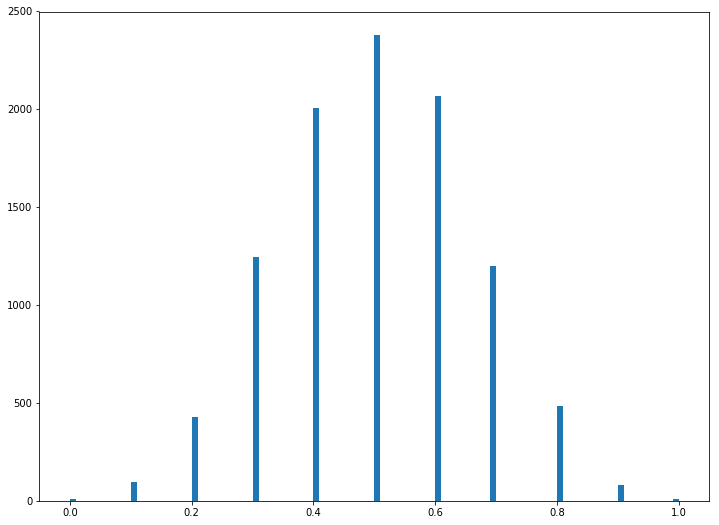

In [7]:
plt.hist(means, bins=100)
plt.show()

In [8]:
np.var(means)

0.025302097499999995

In [9]:
tosses = coin.rvs(size=(10000,10))
vars =  np.var(tosses, axis=1)
np.mean(vars)-p*(1-p)

-0.025127999999999984

MSE
$$E[(T_n(x)-\theta)^2]$$

$$E[T_n(x)]=\theta+bias$$

$$var(T_n(x))=E[(T_n(x)-E[T_n(x)])^2]=E[T_n(x)^2]-E[T_n(x)]^2 $$

$$MSE[T_n(x)]=var[T_n(x)]+bias^2$$

## Hypothesis testing

### Is a coin fair?  

#### Null hypothesis and p-value

Probability of obtaining same or more extreme results for test statistics assuming that null hyphothesis it true. 

$$P(|t|>|t(D)| \; |H_0)$$

$$P(t>t(D) \; |H_0)\qquad\qquad P(t < t(D) \; |H_0)$$

#### I type error and significance level

We are rejecting $H_0$ if $P(D|H_0)<\alpha$

Probability of rejecing a true null hyphothesis is less then $\alpha$. 

$H_0$ - coin is fair

In [10]:
def h_null(n):
    return  stats.binom(n,0.5)

In [11]:
def p_val(n, nh):
    if nh>n/2:
        nh = n -nh
    return 2*np.sum(
        h_null(n).pmf(np.arange(0,nh+1))  
    )
p_val=np.vectorize(p_val)

In [12]:
pd.options.display.max_columns = 24

In [13]:
ns=np.arange(0,21)
print(pd.DataFrame(np.stack((ns,p_val(20,ns)) ), index=("n",'p-val') )  )

             0        1         2         3         4         5         6   \
n      0.000000  1.00000  2.000000  3.000000  4.000000  5.000000  6.000000   
p-val  0.000002  0.00004  0.000402  0.002577  0.011818  0.041389  0.115318   

             7         8         9          10         11         12  \
n      7.000000  8.000000  9.000000  10.000000  11.000000  12.000000   
p-val  0.263176  0.503445  0.823803   1.176197   0.823803   0.503445   

              13         14         15         16         17         18  \
n      13.000000  14.000000  15.000000  16.000000  17.000000  18.000000   
p-val   0.263176   0.115318   0.041389   0.011818   0.002577   0.000402   

             19         20  
n      19.00000  20.000000  
p-val   0.00004   0.000002  


In [14]:
def p_val_binom(n, nh):
    if nh < n/2:
        nh= n-nh
    return 2*h_null(n).sf(nh-1)
p_val_binom=np.vectorize(p_val_binom)

In [15]:
def nh_crit(alpha, n):
    i=0
    while p_val(n,i)<alpha:
        i+=1
    return i-1    
nh_crit= np.vectorize(nh_crit)    

In [16]:
def stem(pl, x,y,pval,alpha = 0.05):
    colors = ['r' if p < alpha else dc for p in pval]

    markerline, stemlines, baseline = plt.stem(x,y,markerfmt='none')
    plt.setp(baseline, color=dc, linewidth=1)
    i=0
    for s in stemlines:
        plt.setp(s,color=colors[i])  
        s.set_zorder(10)
        i+=1
    lcol = plt.scatter(markerline.get_xdata(), markerline.get_ydata(),
            marker='o', c=colors, )
    lcol.set_zorder(20)

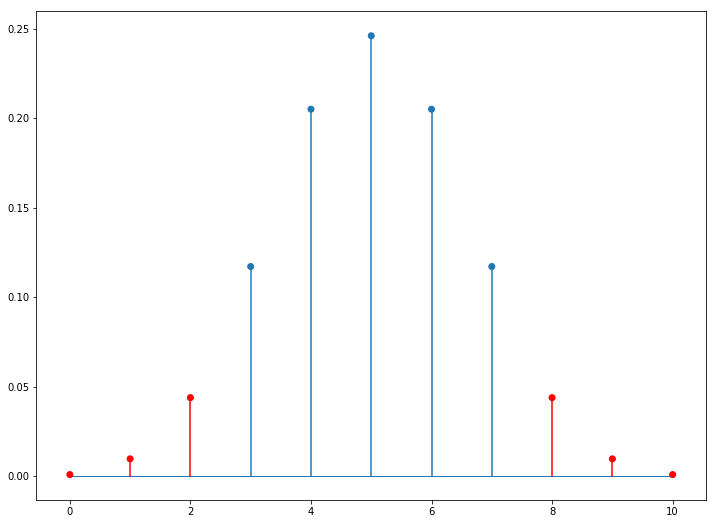

In [17]:
ns = np.arange(0,11)
ps = h_null(10).pmf(ns)
stem(plt, ns,ps, p_val(10, ns), 0.15)
plt.show()

In [18]:
n_tosses = 20
n_trials = 10000
sample =  stats.binom(n=n_tosses, p = 0.5).rvs(n_trials)

In [19]:
%time pvs=p_val_binom(n_tosses,sample)
np.sum(pvs<0.05)

CPU times: user 7.34 s, sys: 55.6 ms, total: 7.4 s
Wall time: 7.36 s


412

In [20]:
sample =  stats.binom(n=n_tosses, p = 0.6).rvs(n_trials)

In [21]:
pvs=p_val_binom(n_tosses,sample)
np.sum(pvs>0.05)

8713

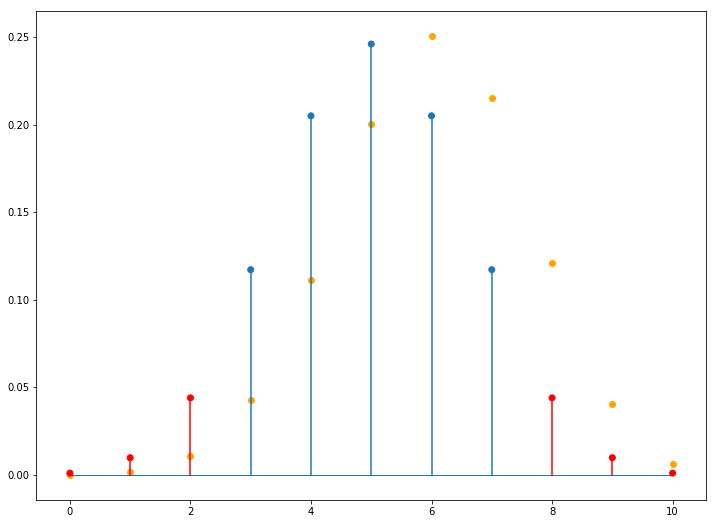

In [22]:
ps_1 = stats.binom(n=10,p=0.6).pmf(ns)
stem(plt, ns,ps, p_val(10, ns), 0.15)
plt.scatter(ns,ps_1,marker='o', color='orange')
plt.show()

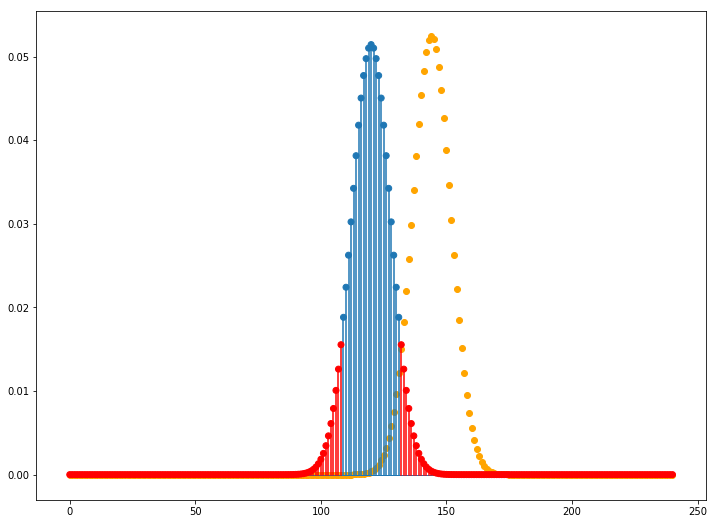

In [23]:
n=240
ns=np.arange(0,n+1)
ps_0 = stats.binom(n=n,p=0.5).pmf(ns)
ps_1 = stats.binom(n=n,p=0.6).pmf(ns)
stem(plt, ns,ps_0, p_val(n, ns), 0.15)
plt.scatter(ns,ps_1,marker='o', color='orange')
plt.show()

#### Power of test

#### II type error

#### Alternative hypothesis

What is the probability that under a true $H_1$ hypothesis the null hyphothesis will be accepted ? 

$$\sum_{\{D\in\mathcal{D}: P(D|H_0)>\alpha\}} P(D|H_1)$$

$$\beta = \sum_{\{D\in\mathcal{D}: P(D|H_0)>\alpha\}} P(D|H_1)$$

$1-\beta$ power of test

In [101]:
def beta(alpha, p,n):
    nh_c = nh_crit(alpha,n)
    return np.sum(stats.binom(p=p,n=n).pmf(np.arange(nh_c+1, n-nh_c)))
beta=np.vectorize(beta)    

In [102]:
ns = np.arange(0,500,10)[1:]
bs = beta(0.05, 0.6, ns)

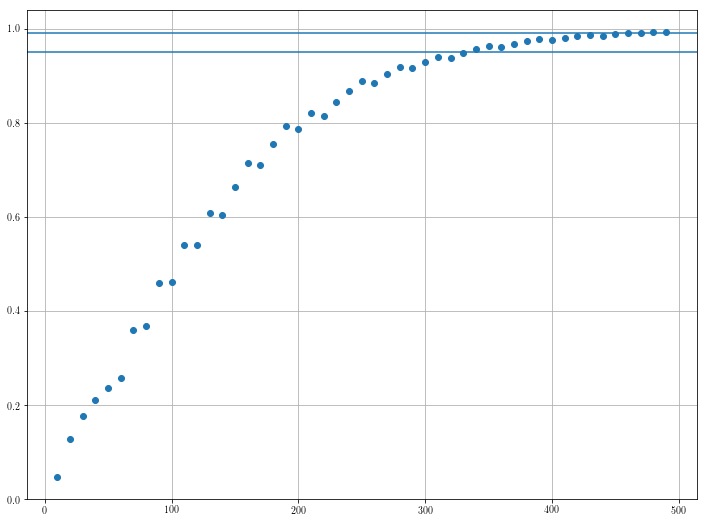

In [103]:
plt.plot(ns,1-bs,'o')
plt.axhline(0.95)
plt.axhline(0.99)
plt.grid()
plt.show()

In [104]:
nhs=nh_crit(0.05,ns)

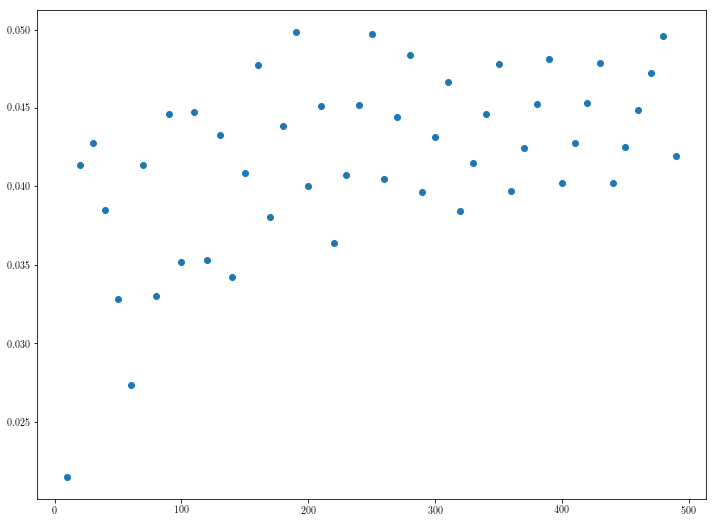

In [105]:
plt.plot(ns,p_val(ns, nhs),'o')
plt.show()

#### Sample size

In [107]:
ns[np.argmax(bs>0.95)]

10

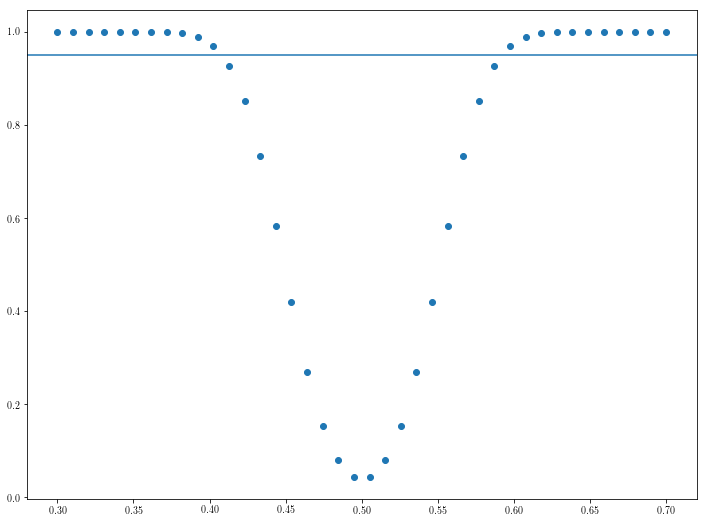

In [115]:
ps = np.linspace(.3,.7,40)
bs= beta(0.05,ps,400)
plt.plot(ps,1-bs,'o')
plt.axhline(0.95)
plt.show()

#### z-test

$$z = \frac{\bar{X}-\mu_0}{\sigma_0}\sqrt{n} \sim \mathcal{N}(0,1)$$

Binomial with $n$ trials $\sim N\left(p \cdot n,\sqrt{n}\cdot p\cdot (1-p)\right)$

In [30]:
n = 10
p = 0.5
ns = np.arange(0, n+1)
bps = stats.binom(p=p, n=n ).pmf(ns)
mu=n*p;
sigma =np.sqrt(n*p*(1-p))
xs = np.linspace(0,n,100)
nps = stats.norm(loc = mu, scale = sigma ).pdf(xs)

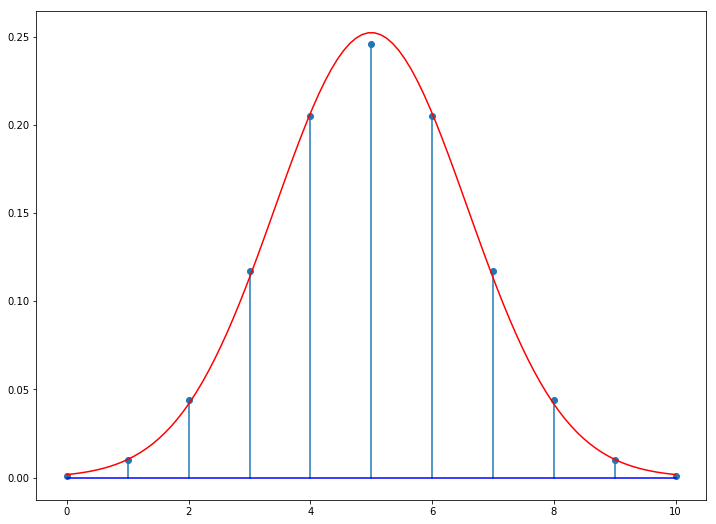

In [31]:
plt.stem(ns,bps, basefmt='b-')
plt.plot(xs, nps,'-r')
plt.show()

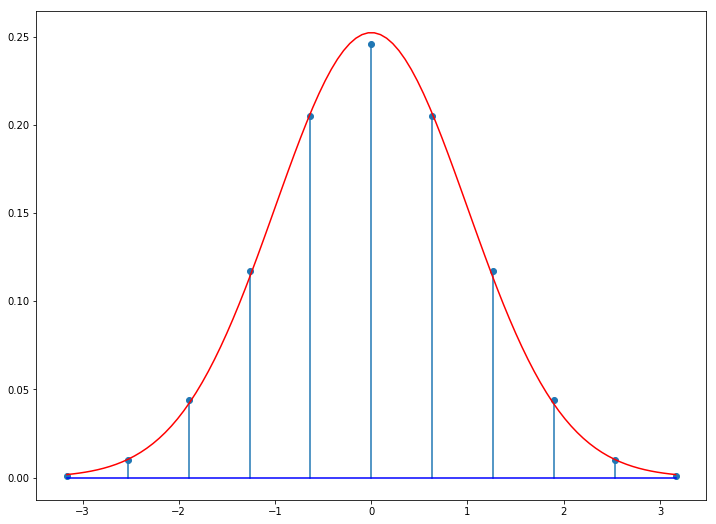

In [32]:
n=10
p=0.5
ns = np.arange(0,n+1)
xs=(np.linspace(0,n,100)-mu)/sigma
bps = stats.binom(p=0.5, n=10 ).pmf(ns)
plt.stem((ns-mu)/sigma,bps, basefmt='b')
plt.plot(xs,stats.norm.pdf(xs)/sigma,'-r')
plt.show()

In [33]:
bps

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

$$p_{val}(x) = 2*\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{-|x|} e^{-\frac{1}{2}t^2}\text{d}t = 2*\Phi(-|x|) = 
2*Q(|x|)),\qquad Q(x)=1-\Phi(x)$$

$\DeclareMathOperator\erf{erf}$
$$\Phi(x)=\frac{1}{2}\left(1+\erf\left(\frac{x}{\sqrt{2}}\right)\right),\qquad \erf(x) = \frac{2}{\sqrt{\pi}}\int_0^x\,e^{-t^2}\text{d}t$$

In [34]:
def p_val_norm(x):
    return 2*stats.norm.cdf(-np.abs(x))
p_val_norm = np.vectorize(p_val_norm)

In [35]:
n = 100
p = 0.5
mu = p*n
sigma = np.sqrt(n*p*(1-p))
nhs=np.arange(0,1.1*n/3)
pvs = p_val(n,nhs) 
pvs_norm =p_val_norm((nhs-mu)/sigma)

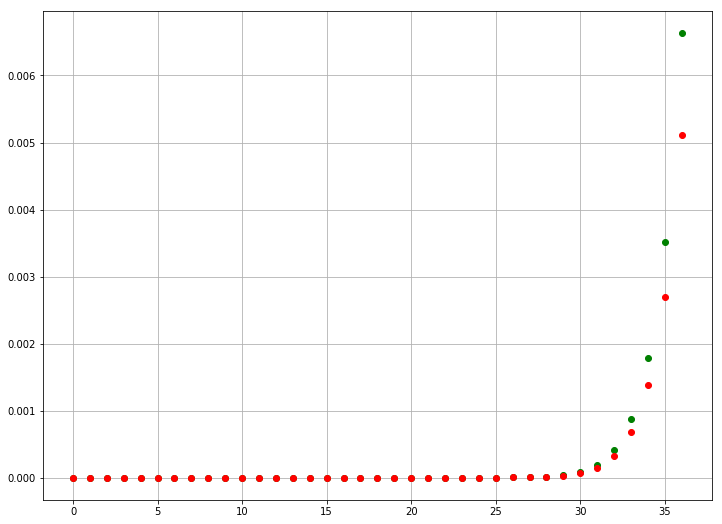

In [36]:
plt.plot(nhs, pvs, 'og')
plt.plot(nhs, pvs_norm, 'or')
plt.grid()
plt.show()

$$z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} $$

$$ z_c(\alpha)  =  Q^{-1}\left(\frac{\alpha}{2}\right) $$

In [37]:
def z_cr(alpha):
    return stats.norm.isf(alpha/2)

In [38]:
mu_null = 1
sigma_null = 0.75
X = stats.norm(loc=mu_null, scale = sigma_null)

In [39]:
n=24
sample = X.rvs(size=n)

In [40]:
z  = (sample.mean()-mu_null)/(sigma_null/np.sqrt(n))
print(z)
print(p_val_norm(z))

0.7171733743290017
0.47326712595605447


In [41]:
mu = 1.1
X = stats.norm(loc=mu, scale = sigma_null)

In [42]:
n=24
sample = X.rvs(size=n)
sample.mean()

1.0340987479395924

In [43]:
z  = (sample.mean()-mu_null)/(sigma_null/np.sqrt(n))
print(z)
print(p_val_norm(z))

0.22273208885274856
0.8237440253425162


#### z-test power

$$1 - \int_{-x_-}^{x_{+}}\text{d}x \, P(x| H_1),\;\quad x_{\pm}=\mu \pm \frac{\sigma}{\sqrt{n}}\, z_{cr}  $$

$$ P(x|H_1) \propto \mathcal{N}(\mu_1, \sigma) $$ 

$$ \beta(\alpha,n)  = \Phi\left(\sqrt{n}\frac{\mu_0-\mu_1}{\sigma_0}+z_{cr}(\alpha)\right)
+\Phi\left(\sqrt{n}\frac{\mu_0-\mu_1}{\sigma_0}-z_{cr}(\alpha)\right)$$

In [44]:
def beta_loc(delta,s,a,n):
    zc = z_cr(a)
    z = np.sqrt(n)*delta/s
    return stats.norm.cdf(z+zc)-stats.norm.cdf(z-zc)
beta_loc = np.vectorize(beta_loc)

In [45]:
ds = np.linspace(-1.,1,50)
bs = 1-beta_loc(ds,sigma_null,0.05, 24 )

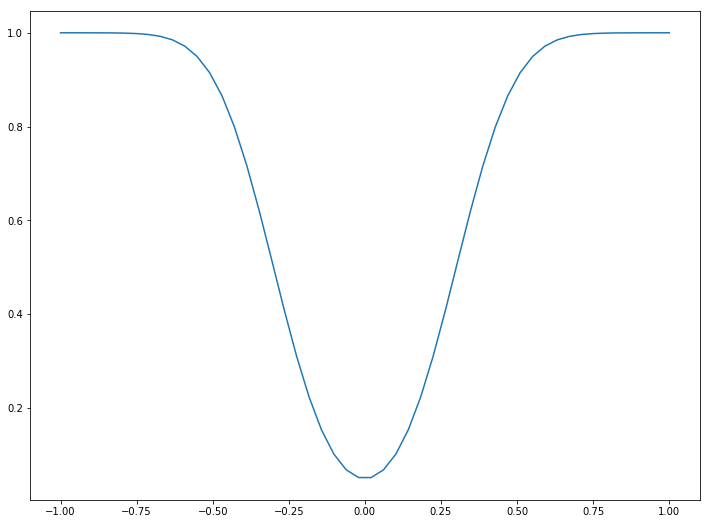

In [46]:
plt.plot(ds,bs)
plt.show()

In [47]:
ass = np.linspace(0.001,0.05,50)
bs = 1-beta_loc(.5,sigma_null,ass, 24 )

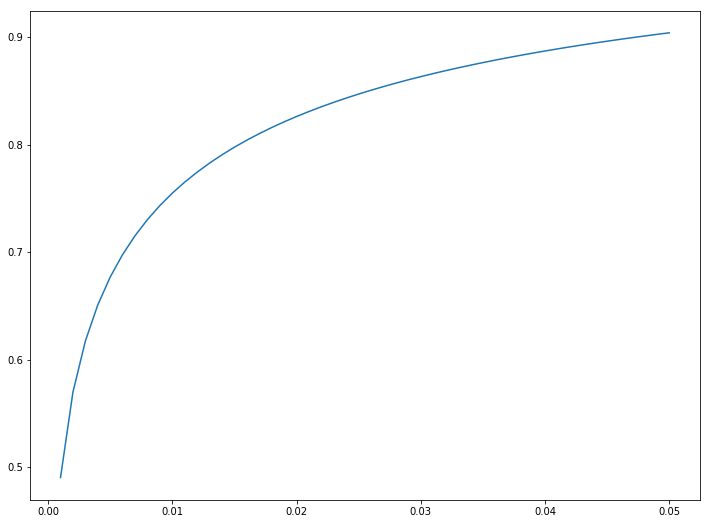

In [48]:
plt.plot(ass,bs)
plt.show()

In [49]:
ns = np.linspace(4,1000,50)
bs = 1-beta_loc(0.1,sigma_null,0.05, ns )

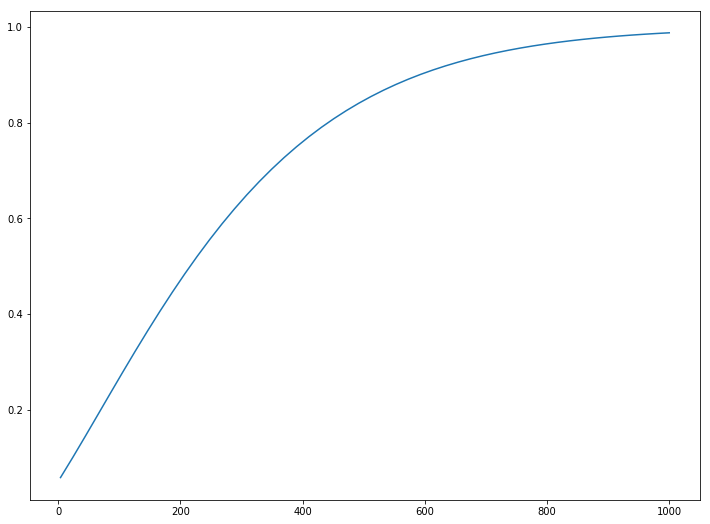

In [50]:
plt.plot(ns,bs)
plt.show()

#### t-test Students distribution

$$t = \frac{\bar{X}-\mu}{s/\sqrt{n}}$$

$$s=\sqrt{\frac{1}{n-1}\sum_i(X_i-\mu)^2}$$

$t$ follows Student's distribution with $n-1$ degrees of freedom.

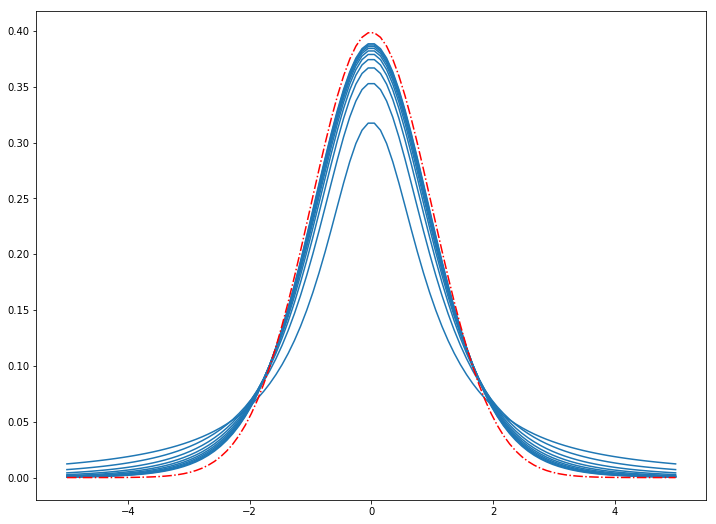

In [51]:
xs = np.linspace(-5,5,100)

for df in range(1,11):
    ts = stats.t(df=df).pdf(xs)
    plt.plot(xs,ts,'-', c=dc)
ts = stats.norm.pdf(xs)
plt.plot(xs,ts,'-.r')    
plt.show()

In [52]:
mu_null = 1
sigma_null = 1
X = stats.norm(loc=mu_null, scale = sigma_null)
sample = X.rvs(size=24)
t=(np.mean(sample)-mu_null)/(np.std(sample, ddof=1)/np.sqrt(sample.size))
2*(stats.t(df=sample.size-1).sf(np.abs(t)) )

0.10808997156096832

In [53]:
mu = 1
sigma = 5
X = stats.norm(loc=mu, scale = sigma)
sample = X.rvs(size = 24)
t=(np.mean(sample)-mu_null)/(np.std(sample, ddof=1)/np.sqrt(sample.size))
2*(stats.t(df=sample.size-1).sf(np.abs(t)) ) 

0.5800142111530596

In [54]:
mu = 2
sigma = 1
X = stats.norm(loc=mu, scale = sigma)

sample = X.rvs(size = 24)

t=(np.mean(sample)-mu_null)/(np.std(sample, ddof=1)/np.sqrt(sample.size))
2*(stats.t(df=sample.size-1).sf(np.abs(t)) )

3.6138035633215243e-06

### Comparing distributions

In [55]:
data = pd.read_table("data/dice.txt", header=None, names=["toss"])

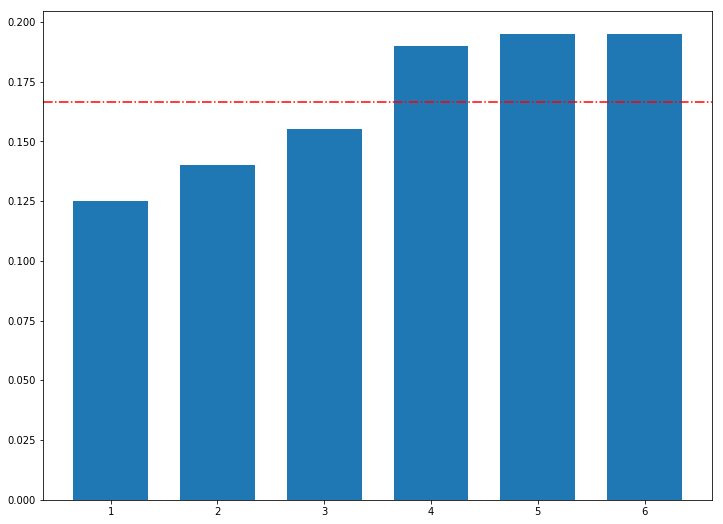

In [56]:
ec='r'
counts,bins,_ = plt.hist(data.values, bins=6, range=(0.5, 6.5), rwidth=0.7, normed=True)
plt.axhline(1/6, linestyle='-.', c=ec)
plt.show()                      

In [57]:
def hist_errorbars(plt,counts, bins, color):
    errors = np.sqrt(counts*(1-counts))/np.sqrt(data.size)
    xs=(bins[:-1]+bins[1:])/2
    pline,cap,bar=plt.errorbar(xs,counts, errors, fmt='none', capsize=8)
    plt.setp(cap[0],c=color)
    plt.setp(cap[1],c=color)
    plt.setp(bar,linestyle='-.', color=color)

#### histogram errors 

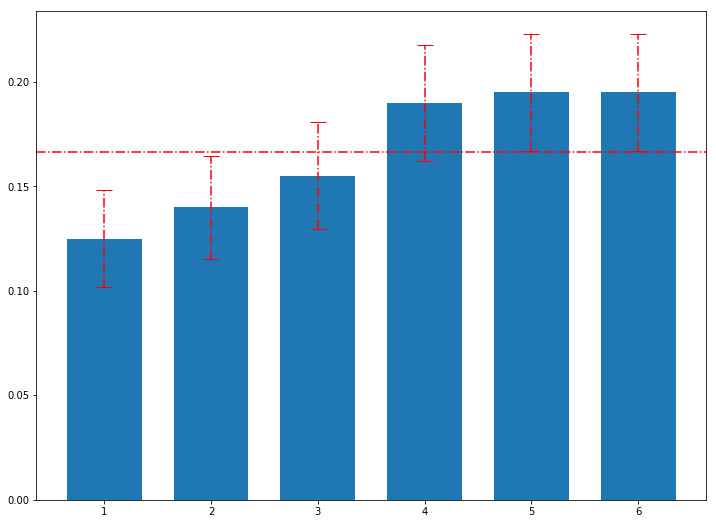

In [58]:
ec='r'
counts,bins,_ = plt.hist(data.values, bins=6, range=(0.5, 6.5), rwidth=0.7, normed=True)
plt.axhline(1/6, linestyle='-.', c=ec)
hist_errorbars(plt,counts, bins, ec)
plt.show()                      

#### chi-square $\chi^2$ goodness of fit test  

$$n_i,\quad i=1\ldots k,\qquad \sum_{i=1}^k n_i = n $$  

$$p_i,\quad i=1\ldots k$$  

$$X^2=\sum_{i=1}^k\frac{(n_i-p_i n)^2}{p_i n} \sim \chi^2(k-1)$$

In [59]:
counts,_ = np.histogram(data.values, bins=6, range=(0.5,6.5))
chi2=np.sum((counts-data.size/6)**2/(data.size/6))
chi2

5.68

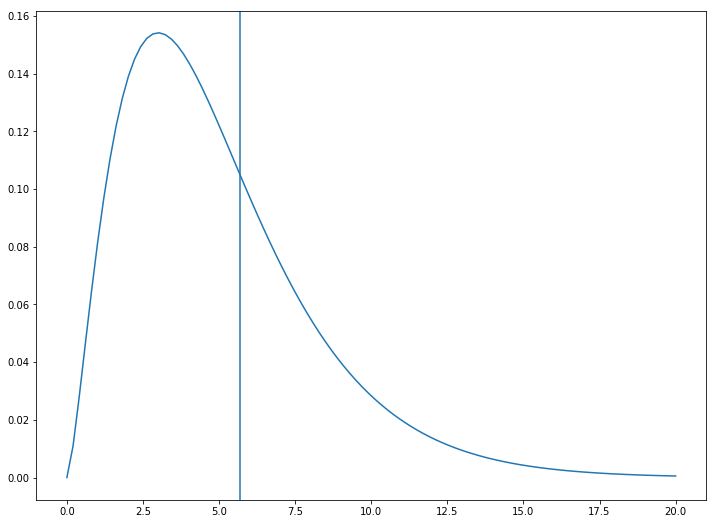

In [60]:
xs=np.linspace(0,20,100)
chs = stats.chi2(5).pdf(xs)
plt.plot(xs,chs)
plt.axvline(chi2)
plt.show()

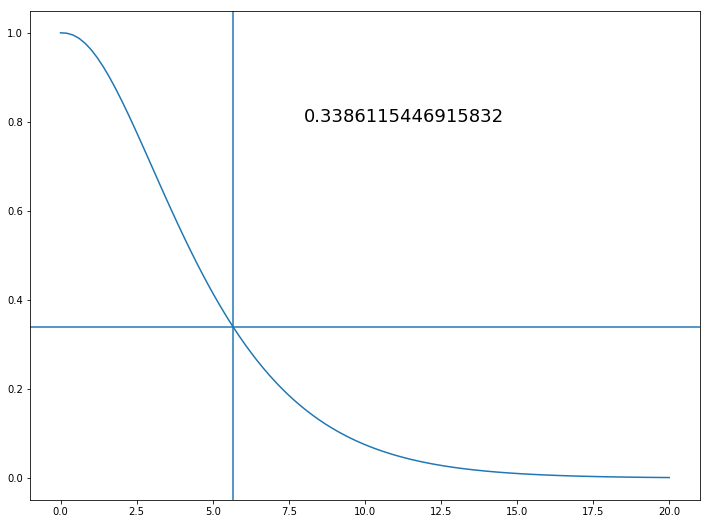

In [61]:
sfs = 1-stats.chi2(5).cdf(xs)
plt.plot(xs,sfs)
plt.axvline(chi2)
plt.axhline(stats.chi2(5).sf(chi2))
pv=stats.chi2(5).sf(chi2)
plt.text(8,0.8,pv, fontsize=18)
plt.show()

In [62]:
stats.chisquare(counts, np.ones(6)*200/6)

Power_divergenceResult(statistic=5.68, pvalue=0.3386115446915832)

In [63]:
stats.chisquare(counts)

Power_divergenceResult(statistic=5.68, pvalue=0.3386115446915832)

In [64]:
data_janek = pd.read_table("data/dice_janek.txt", header=None, names=["toss"])

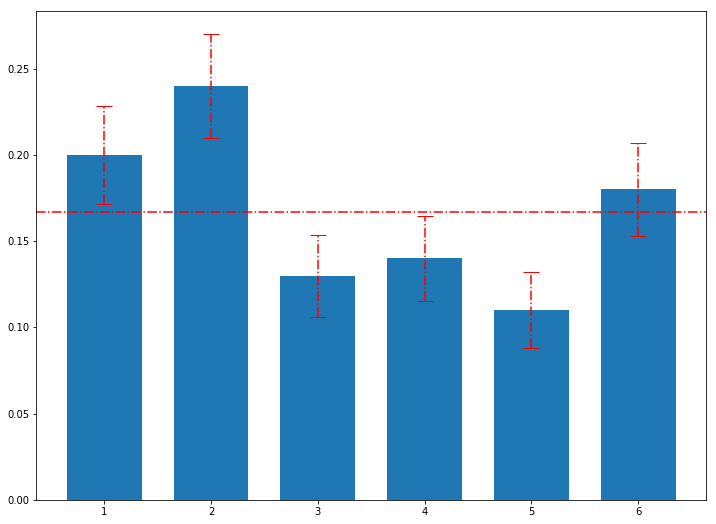

In [65]:
ec='r'
counts,bins,_ =plt.hist(data_janek.values, bins=6, align='mid', rwidth=0.7, range=(0.5,6.5), normed=True)
plt.axhline(1/6, linestyle='-.', c=ec)
hist_errorbars(plt, counts, bins, ec)
plt.show()

In [66]:
data_janek.size

100

In [67]:
counts,_ = np.histogram(data_janek.values, bins=6, range=(0.5,6.5))
stats.chisquare(counts)

Power_divergenceResult(statistic=7.159999999999999, pvalue=0.20901027865188368)

### Power of the chi^2 test

In [68]:
p=np.asarray([6,7,6,5,6,6])/36
print((p/(1/6*np.ones(6))-1))


[ 0.          0.16666667  0.         -0.16666667  0.          0.        ]


In [69]:
n=200
dice = stats.multinomial(p=p, n=n)
rsv =  dice.rvs(size=10000)
chi2s = stats.chisquare(rsv,axis=1)

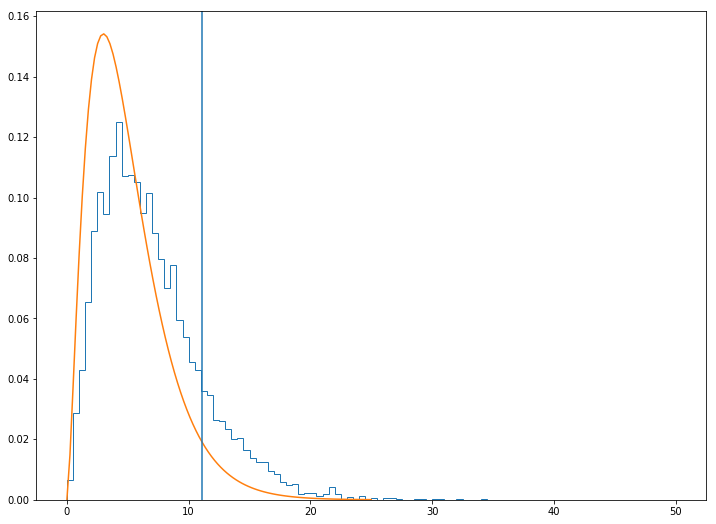

In [70]:
plt.hist(chi2s[0], bins=100, range=(0,50), histtype='step', normed=True)
plt.plot(np.linspace(0,25,100), stats.chi2(5).pdf(np.linspace(0,25,100)))
plt.axvline(stats.chi2(5).isf(0.05))
plt.show()

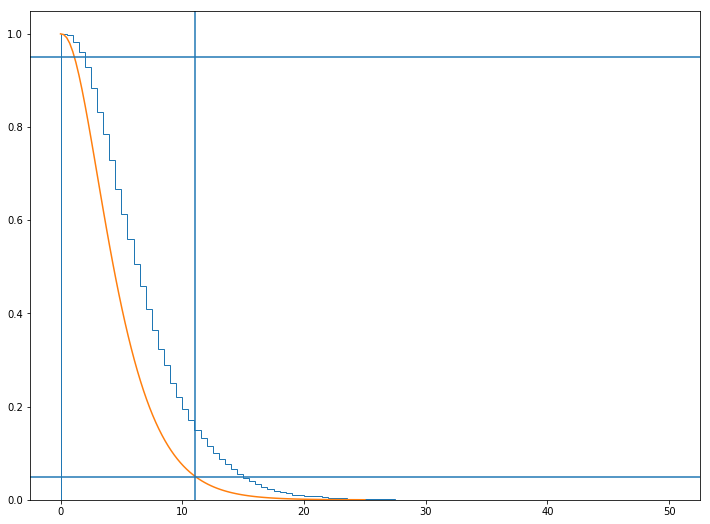

In [71]:
plt.hist(chi2s[0], bins=100, range=(0,50), histtype='step', normed=True, cumulative=-1)
plt.plot(np.linspace(0,25,100), stats.chi2(5).sf(np.linspace(0,25,100)))
plt.axvline(stats.chi2(5).isf(0.05))
plt.axhline(0.05)
plt.axhline(0.95)
plt.show()

#### Kolmogorov Smirnov test

$$D = \sup_x |F_0(X)-G(X)|$$

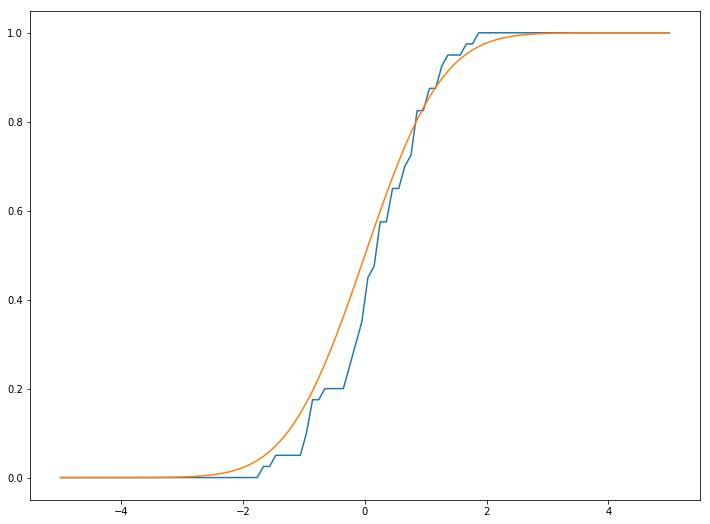

In [72]:
sample = stats.norm.rvs(size=40)
ecdf=ECDF(sample)

xs=np.linspace(-5,5,100)
es = ecdf(xs)
ts = stats.norm.cdf(xs)

plt.plot(xs,es,'-')
plt.plot(xs,ts,'-')
plt.show()

In [73]:
stats.kstest(sample,'norm')

KstestResult(statistic=0.16819085913632925, pvalue=0.1855594151781177)

In [74]:
p=0.6
n=200
sample = (stats.binom(p=p,n=n).rvs(size=200)-p*n)/np.sqrt(n*p*(1-p))

stats.kstest(sample,'norm')

KstestResult(statistic=0.06261695723660077, pvalue=0.3998763224275512)

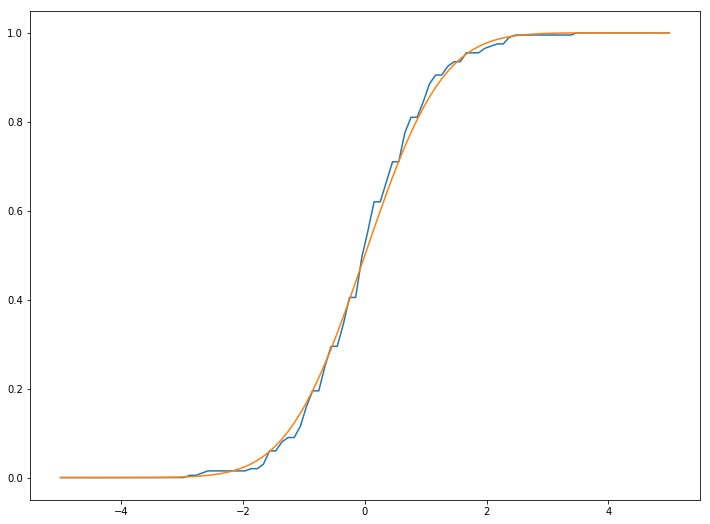

In [75]:
ecdf=ECDF(sample)

xs=np.linspace(-5,5,100)
es = ecdf(xs)
ts = stats.norm.cdf(xs)

plt.plot(xs,es,'-')
plt.plot(xs,ts,'-')
plt.show()

In [76]:
x = np.sort(sample)
gx = stats.norm.cdf(x)
fx = ecdf(x)

In [77]:
np.max(np.max(np.stack((gx[1:]-fx[1:], gx[1:]-fx[:-1]), axis=1), axis =1))

0.04141499634222373

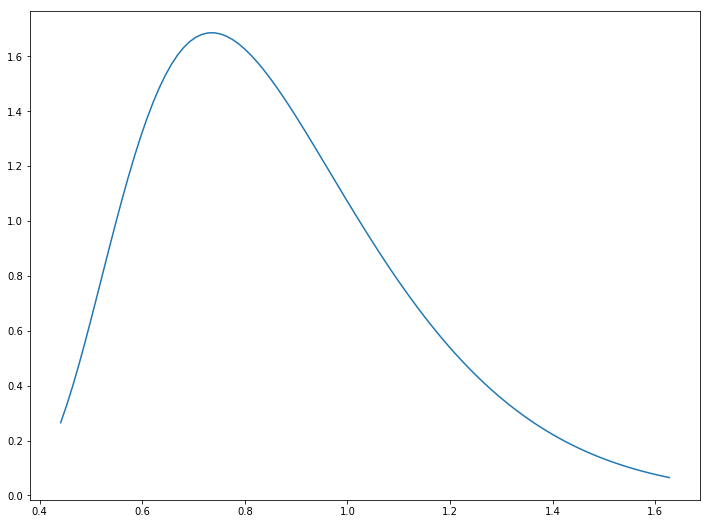

In [78]:
xs=np.linspace(stats.kstwobign.ppf(0.01),stats.kstwobign.ppf(0.99),100)
ks=stats.kstwobign.pdf(xs)
plt.plot(xs,ks)
plt.show()

In [79]:
stats.kstwobign()

## Base rate fallacy

In [80]:
x = np.linspace(1,50, 50)
y =  np.linspace(1,50, 50)
xg,yg = np.meshgrid(x,y)

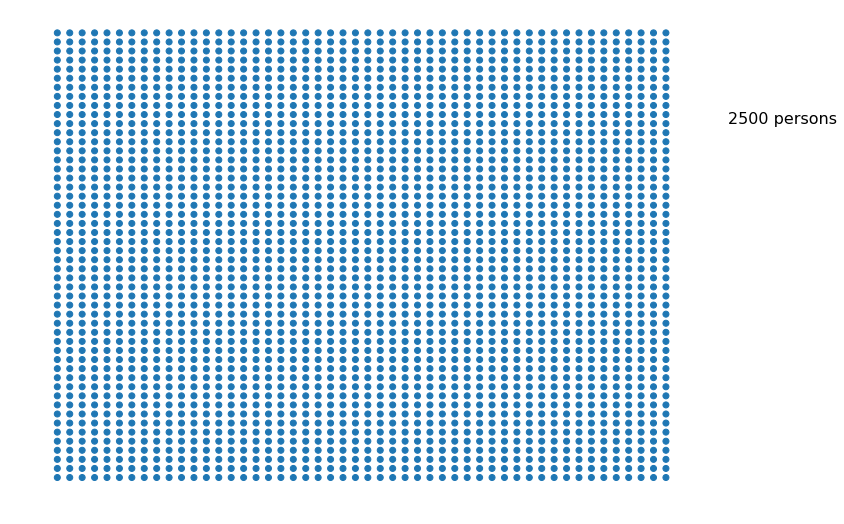

In [81]:
color = np.full(2500,dc)
plt.scatter(xg,yg, marker='o', color = color)
plt.text(55,40,"2500 persons", fontsize=16)
plt.axis('off')
plt.show()

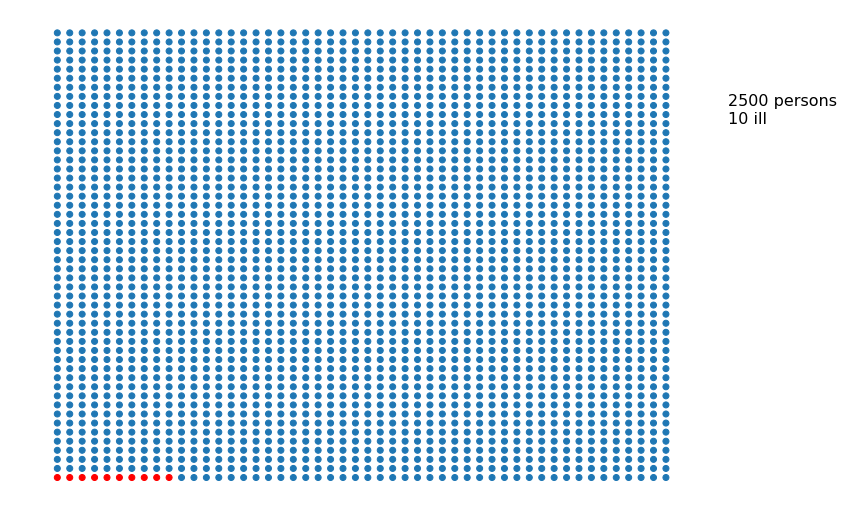

In [82]:
color[0:10]='#ff0000'
plt.scatter(xg,yg, marker='o', color = color)
plt.text(55,40,"2500 persons\n10 ill", fontsize=16)
plt.axis('off')
plt.show()

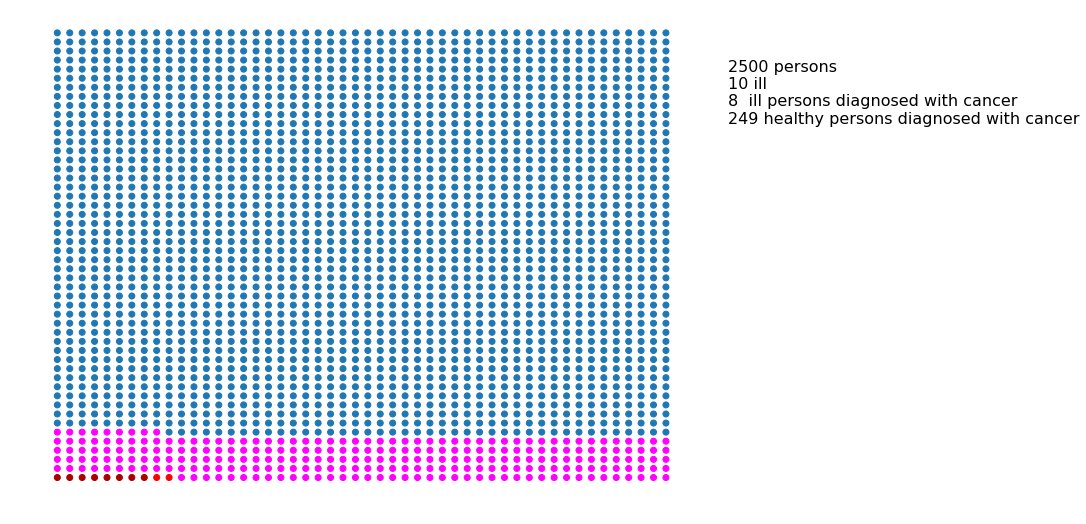

In [83]:
color[0:8]='#aa0000'
color[10:10+249]="#ff00ff"
plt.scatter(xg,yg, marker='o', color = color)
plt.text(55,40,"2500 persons\n10 ill\n8  ill persons diagnosed with cancer\n249 healthy persons diagnosed with cancer", fontsize=16)
plt.axis('off')
plt.show()

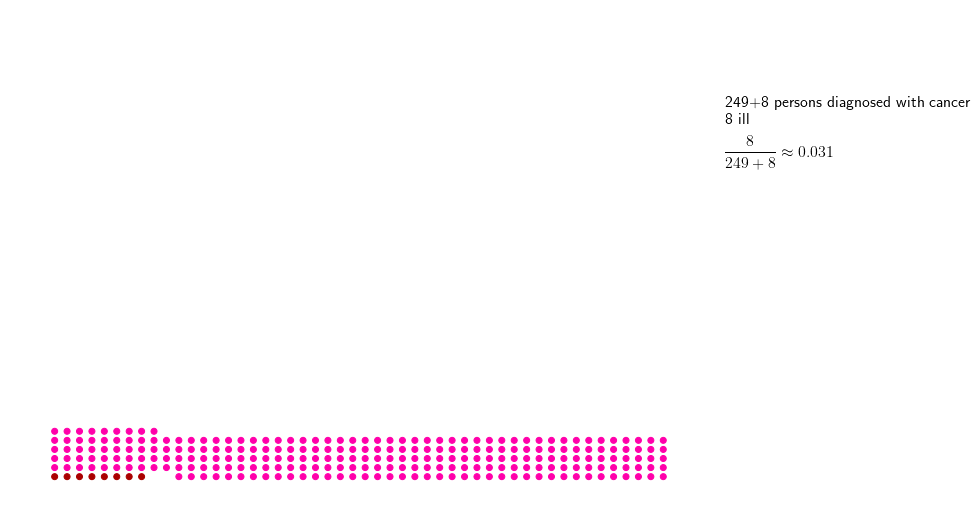

In [84]:
color[0:8]='#aa0000'
color[10:10+249]="#ff00aa"
color[10+249:]="#ffffff"
color[8:10]="#ffffff"
plt.rc('text', usetex=True)
plt.scatter(xg,yg, marker='o', color = color)
plt.text(55,40,"249+8 persons diagnosed with cancer\n8 ill", fontsize=16)
plt.text(55,35,r'$\displaystyle\frac{8}{249+8}\approx 0.031$', fontsize=16)
plt.axis('off')
plt.show()

$$P(P\;|\;ill)=0.8\qquad P(P\;|\;healthy)=0.1$$

$$P(\text{ill}\; |\; P) $$ 

$$P(ill) = 0.004$$

### Bayes formula

$$P(B|A)=\frac{P(A|B) P(B)}{P(A)},\qquad P(A) = \sum_i P(A|B_i) P(B_i) $$ 

$$ P(ill| P) = \frac{P(P| ill) P(ill) }{P(P)} $$

$$ P(ill| P) = \frac{P(P| ill) P(ill) }{P(P|ill)P(ill)+P(P|healthy)P(healthy)} $$

$$\frac{0.8 \times 0.004}{0.8 \times 0.004 + 0.1\times 0.996}\approx 0.031$$

In [85]:
0.8*0.004/(0.8*0.004+0.1*0.996)

0.0311284046692607

## Bayesian estimation

In [86]:
tosses = pd.read_table("data/coin_2.txt",header=None, names=['face'] ).transpose()
tosses

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
face,T,H,T,T,H,T,T,T,T,H,H,H,H,T,H,H,T,T,T,H


#### Maximal likelihood estimate MLE

$$ P_n(\#H = n_h|p) = \binom{n}{n_h} p^{n_h}(1-p)^{n-n_h} $$

$$ \frac{\text{d}}{\text{d} p} P_n(\#H = n_h|p) = \frac{\text{d}}{\text{d} p} \binom{n}{n_h} p^{n_h}(1-p)^{n-n_h} 
= \binom{n}{n_h} p^{n_h-1}(1-p)^{n-n_h-1}(n_H-n p)=0
$$

$$p=\frac{n_H}{n}$$

In [87]:
ts = tosses.loc['face'].map({'H':1, 'T':0}).values

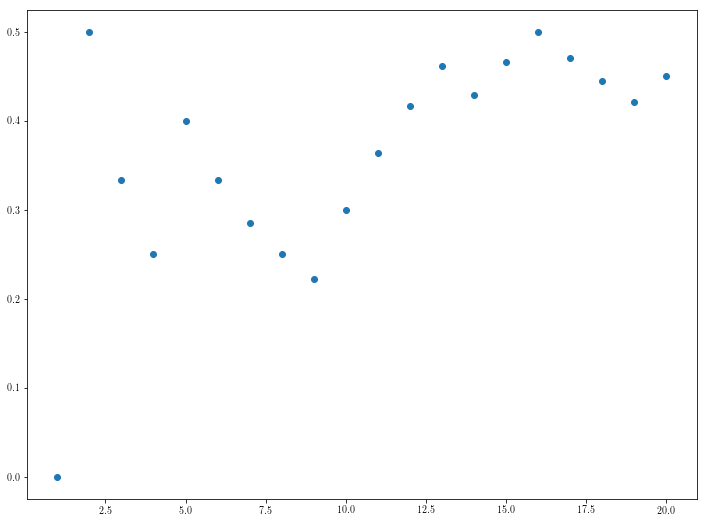

In [88]:
plt.plot(np.arange(1,21),np.cumsum(ts)/np.arange(1,21) , 'o')
plt.show()

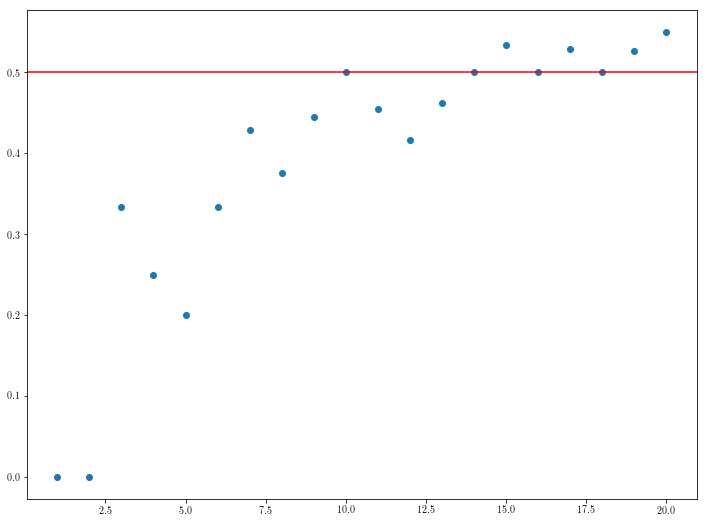

In [89]:
ts=stats.bernoulli(p=0.5).rvs(size=20)
plt.plot(np.arange(1,21),np.cumsum(ts)/np.arange(1,21) , 'o')
plt.axhline(0.5,c='r')
plt.show()

### Prior 

$$P(p)$$

### Posterior

$$ P(p|x) = \frac{P(x|p)P(p)}{P(x)} $$

$$P(x)=\int\text{d}p\;P(x|p)P(p) $$

### Maximum a posteriori MAP estimate

$\DeclareMathOperator{\argmax}{argmax}$
$$\widehat{p}= \underset{p}{\argmax} P(x|p)P(p)$$

$\DeclareMathOperator{\betaop}{Beta}$
$$P(x|p)= p^{n_H}(1-p)^{n-n_H}\sim \betaop(n+1,n-n_H+1) $$
$$\betaop(x:\alpha, \beta) \sim x^{\alpha-1}(1-x)^{\beta-1}$$ 

#### Conjugate priors

$$P(p) \sim \betaop(\alpha,\beta) $$

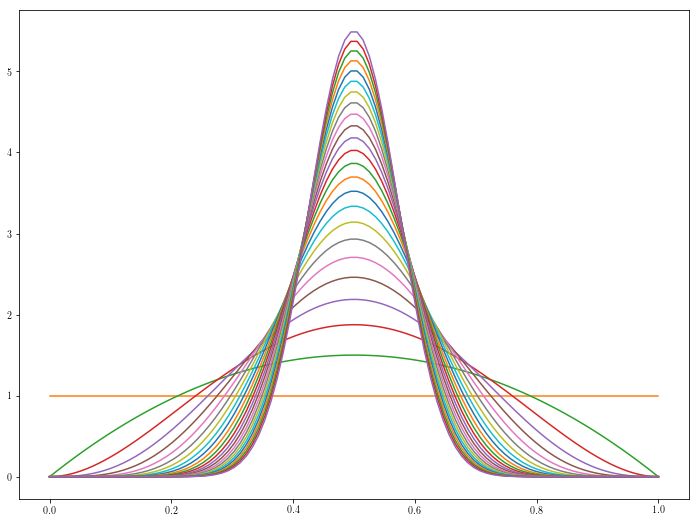

In [90]:
xs=np.linspace(0,1,100)
for alpha in np.arange(0,25):
    bs = stats.beta(a=alpha, b=alpha).pdf(xs)
    plt.plot(xs,bs,'-')
    
plt.show()

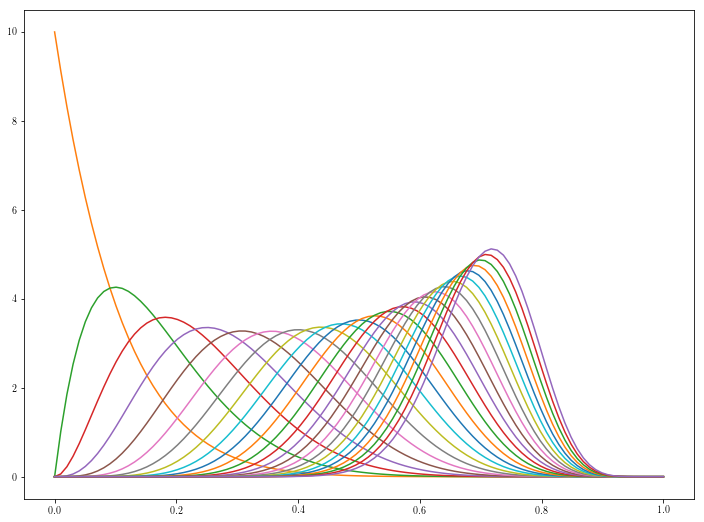

In [91]:
xs=np.linspace(0,1,100)
for alpha in np.arange(0,25):
    bs = stats.beta(a=alpha, b=10).pdf(xs)
    plt.plot(xs,bs,'-')
    
plt.show()

$$P(p|x) \propto p^{n_H}(1-p)^{n-n_H} p^{\alpha-1}(1-p)^{\beta-1} \sim \betaop(n_H+\alpha, n-n_h+\beta)$$ 

MAP
$$p_{MAP}=\frac{n_H+\alpha-1}{n+\alpha+\beta-2}$$

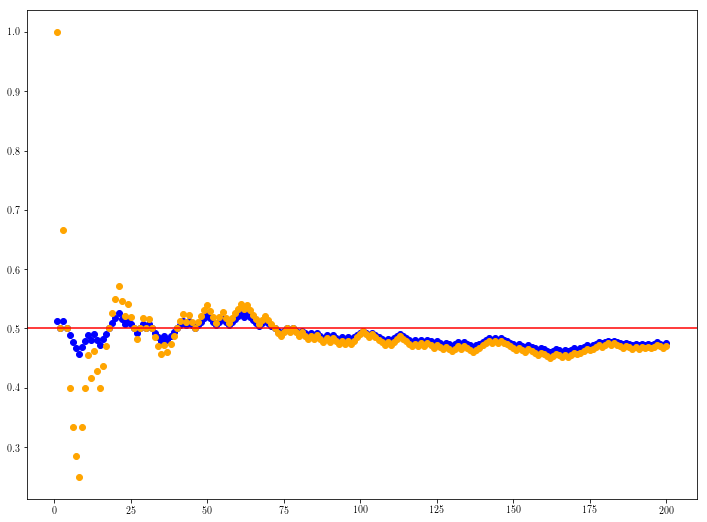

In [92]:
alpha= 20
beta = 20
n=200
ts=stats.bernoulli(p=0.5).rvs(size=n)
plt.plot(np.arange(1,n+1),(np.cumsum(ts)+alpha-1)/(np.arange(1,n+1)+alpha+beta-2) , 'ob')
plt.plot(np.arange(1,n+1),(np.cumsum(ts))/(np.arange(1,n+1)) , 'o', color='orange')
plt.axhline(0.5,c='r')
plt.show()

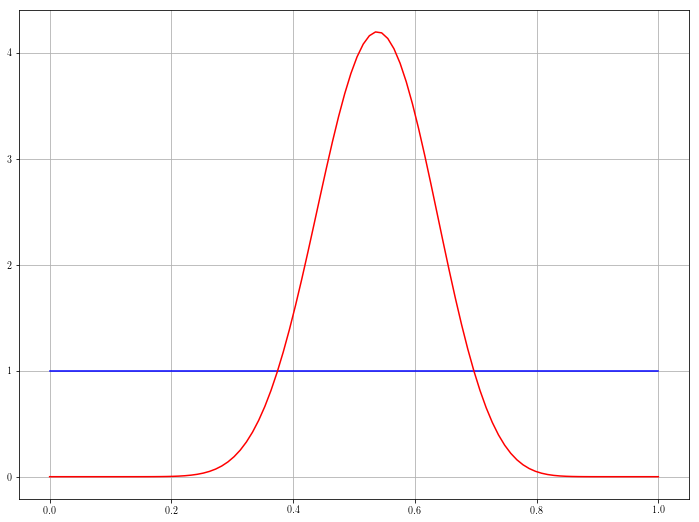

In [93]:
alpha= 1
beta = 1
n=100
ts=stats.bernoulli(p=0.5).rvs(size=n)
xs = np.linspace(0,1,100)
csum = np.cumsum(ts)
i=25
plt.plot(xs, stats.beta(a=alpha, b=beta ).pdf(xs),'-b')
plt.plot(xs, stats.beta(a=alpha+csum[i], b=beta + i+1-csum[i] ).pdf(xs),'-r')
plt.grid()    
plt.show()

### Predictive posterior distribution

$$ P(y|x) = \int_{p}P(y|p) P(p|x) $$

$$ P(y|x) = \frac{1}{P(x)} \int_{p}P(y|p) P(x|p) P(p) $$

$$ q = \frac{n\bar{x}+\alpha}{n+\alpha+\beta} $$